In [69]:
import pyspark
sc = pyspark.SparkContext()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-1-898a6c308479>:2 

In [ ]:
# load single file
#xmlfiles=sc.wholeTextFiles('/project/datasets/TimesOCR/TDA_GDA_1785-2007/1860/18600215/0FFO-1860-FEB15.xml')

In [85]:
xmlfiles=sc.wholeTextFiles('/project/datasets/TimesOCR/TDA_GDA_1785-2007/1860/1860*/*.xml',64)

In [86]:
print(xmlfiles.getNumPartitions())
print(xmlfiles.count())

59
310


In [ ]:
xmlfiles.first()

In [129]:
f=open("/project/datasets/TimesOCR/TDA_GDA_1785-2007/1860/18600214/0FFO-1860-FEB14.xml",encoding="iso-8859-1")
newspaper_text=f.read()
f.close()

In [130]:
searchterm="Canada"

def simple_process_day(mystring):
    count = mystring.count(searchterm)
    return count

def newsonly_process_day(mystring):
    
    article_end="</article>"
    ct="<ct>News</ct>"
    inside_news=False
    count=0
    
    mystring_lines=mystring.split("\n")
    
    for textline in mystring_lines:
        if textline.count(ct) > 0:
            inside_news=True
        if textline.count(article_end)>0:
            inside_news=False
        if(inside_news==True):
            count=count+textline.count(searchterm)
    return count

import lxml
from bs4 import BeautifulSoup
def bs4_process_day(fstring):

    soup = BeautifulSoup(fstring,"lxml")
    searchterm="Canada"
    count=0
    taglist = soup.find_all("article")

    for tag in taglist:
        ct_tag=tag.find_all("ct")
        if(ct_tag[0].string=="News"):
            articletext=tag.find_all("text.cr")
            words=articletext[0].find_all("wd")
            found=False
            for w in words:
                if (w.string==searchterm) :
                    found=True
                    count=count+1
    return count




print("output",bs4_process_day(newspaper_text))

output 0


In [124]:
canada_counts=xmlfiles.map(lambda el: newsonly_process_day(el[1]))
canada_counts.count()

310

In [ ]:
canada_counts.first()

In [125]:
canada_counts_withdates=xmlfiles.map(lambda el: (el[0][55:63],newsonly_process_day(el[1])))
canada_counts_withdates.take(4)

[('18600201', 0), ('18600716', 3), ('18600908', 0), ('18601110', 1)]

In [126]:
dates=canada_counts_withdates.collect()

In [101]:
import datetime

dd=datetime.date(1860,3,2)
print(dd)

1860-03-02


In [127]:
python_dates=[]
for d in dates:
    date_in_datetime=datetime.date(int(d[0][0:4]),int(d[0][4:6]),int(d[0][6:8]))
    python_dates.append((date_in_datetime,d[1]))
    
print(python_dates)

[(datetime.date(1860, 2, 1), 0), (datetime.date(1860, 7, 16), 3), (datetime.date(1860, 9, 8), 0), (datetime.date(1860, 11, 10), 1), (datetime.date(1860, 6, 14), 1), (datetime.date(1860, 1, 20), 0), (datetime.date(1860, 7, 28), 0), (datetime.date(1860, 10, 24), 2), (datetime.date(1860, 3, 27), 2), (datetime.date(1860, 9, 28), 0), (datetime.date(1860, 6, 16), 1), (datetime.date(1860, 6, 20), 2), (datetime.date(1860, 1, 24), 4), (datetime.date(1860, 1, 5), 1), (datetime.date(1860, 12, 11), 4), (datetime.date(1860, 6, 12), 0), (datetime.date(1860, 3, 2), 7), (datetime.date(1860, 1, 18), 0), (datetime.date(1860, 8, 27), 0), (datetime.date(1860, 4, 5), 2), (datetime.date(1860, 8, 15), 1), (datetime.date(1860, 7, 21), 3), (datetime.date(1860, 9, 10), 12), (datetime.date(1860, 5, 28), 4), (datetime.date(1860, 4, 7), 1), (datetime.date(1860, 11, 30), 1), (datetime.date(1860, 8, 7), 4), (datetime.date(1860, 10, 30), 4), (datetime.date(1860, 4, 6), 0), (datetime.date(1860, 1, 12), 4), (datetime.d

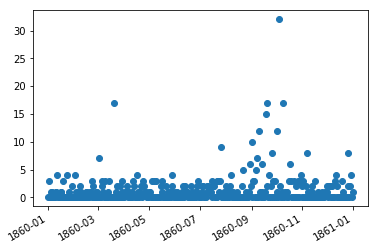

In [128]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import drange
from numpy import zeros

date1 = datetime.datetime(1860,1,1)
date2 = datetime.datetime(1861,1,1)
delta = datetime.timedelta(days=1)
dates = drange(date1,date2,delta)
data=zeros(len(dates))

# fill in the data

for ele in python_dates:
    data[ele[0].toordinal()-date1.toordinal()]=ele[1]
    
fig, ax = matplotlib.pyplot.subplots()

ax.plot_date(dates,data)

fig.autofmt_xdate()

plt.show()


# Heat Map

In [131]:
f=open("/project/datasets/TimesOCR/TDA_GDA_1785-2007/1860/18600102/0FFO-1860-JAN02.xml",encoding="iso-8859-1")
newspaper_text=f.read()
f.close()

In [147]:
import re
searchterm="canada"
def process_newspaper(whole_newspaper):
    list_of_lines=whole_newspaper.split("\n")
    
    list_positions=[]
    regEx = re.compile(r"<wd pos=\"(\d+,\d+,\d+,\d+)\">")
    for line in list_of_lines:
        if (line.lower().count(searchterm))>0:
            m = re.search(regEx,line)
            if m != None:
                list_positions.append(m.group(1))
    return list_positions
            
print(process_newspaper(newspaper_text))

['618,1902,720,1929', '152,1941,255,1967', '212,2807,314,2836', '272,3684,414,3711', '48,4768,158,4795', '1734,5598,1840,5628', '2469,3632,2677,3674', '2729,3958,2834,3988', '2471,4411,2576,4440', '4093,2302,4376,2340', '4637,2332,4741,2362', '2246,4682,2350,4714', '1827,4725,1934,4757', '3220,443,3330,479', '3358,1771,3480,1809', '1209,689,1346,728', '1668,1287,1803,1328', '1730,6242,1830,6270', '2060,6332,2164,6365', '2621,582,2759,621', '2455,974,2591,1017', '4348,5209,4468,5244']


In [150]:
xmlfiles=sc.wholeTextFiles('/project/datasets/TimesOCR/TDA_GDA_1785-2007/1860/1860*/*.xml',64)
#xmlfiles=sc.wholeTextFiles('/project/datasets/TimesOCR/TDA_GDA_1785-2007/1860/18600102/0FFO-1860-JAN02.xml')
print(xmlfiles.count())

310


In [154]:
position_data=xmlfiles.flatMap(lambda el: process_newspaper(el[1]))

In [156]:
positions=position_data.collect()

In [161]:
import numpy as np
frontPage = np.zeros((7000,5250))
frontPage = frontPage.astype('uint32')

for p in positions:
    pos = str(p).split(",")
    posList=[int(item) for item in pos]
    frontPage[posList[1]:posList[3],posList[0]:posList[2]] += 1
    
import matplotlib.pyplot as plt
plt.figure(figsize=(200,200))
image = plt.imshow(frontPage)
plt.show()